## Problem 1 : The Maze and the Random Minotaur

In [1]:
import numpy as np
import maze as mz

maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])


 (a) Formulate the problem as an MDP.

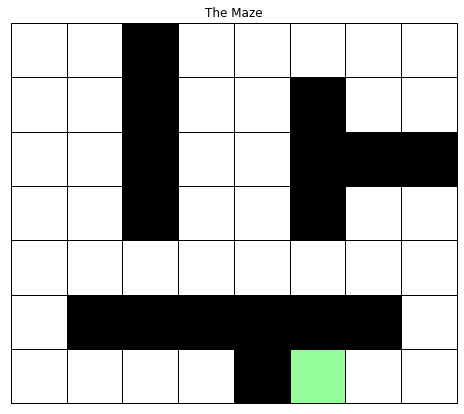

In [7]:
mz.draw_maze(maze)
minotaurStay= False
env = mz.Maze(maze,minotaurStay)

b) Solve the problem, and illustrate an optimal policy for T = 20. Plot the maximal probability of exiting the maze as a function of T. Is there a dierence if the minotaur is allowed to stand still? If so, why?

In [8]:

horizon = 20
V, policy= mz.dynamic_programming(env,horizon);
method = 'DynProg';
start  = ((0,0),(6,5));
path = env.simulate(start, policy, method);



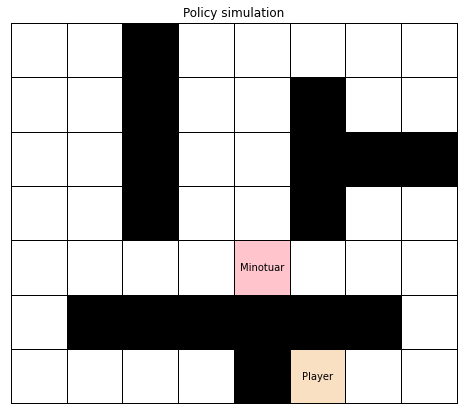

In [9]:
mz.animate_solution(maze, path)

The maximal probability of exiting the maze as a function of T for two cases if the minotaur is : 1.)allowed to stand still and 2.)not allowed to stand still

In [19]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import time 
max_iter=10000
Horizons = [5,10,15,17,19,21,23,25,30,40]


minotaurStay= False
env = mz.Maze(maze,minotaurStay)

P=[]
for horizon in tqdm(Horizons,desc='Running simulations for still :false'):
    win_count=0
    V, policy= mz.dynamic_programming(env,horizon);
    for i in range(max_iter):
        method = 'DynProg';
        start  = ((0,0),(6,5));
        path = env.simulate(start, policy, method);
        if(path[-1][0]==(6,5)):
            win_count+=1
  
    winning_prob = win_count/max_iter
    P.append(winning_prob)


minotaurStay= True
env = mz.Maze(maze,minotaurStay)

P_stay=[]
for horizon in tqdm(Horizons,desc='Running simulations for still :true'):
    win_count=0
    V, policy= mz.dynamic_programming(env,horizon);
    for i in range(max_iter):
        method = 'DynProg';
        start  = ((0,0),(6,5));
        path = env.simulate(start, policy, method);
        if(path[-1][0]==(6,5)):
            win_count+=1
    winning_prob = win_count/max_iter
    P_stay.append(winning_prob)






Running simulations for still :false:   0%|          | 0/10 [00:00<?, ?it/s]

Running simulations for still :false:  10%|█         | 1/10 [00:02<00:22,  2.49s/it]

Running simulations for still :false:  20%|██        | 2/10 [00:07<00:25,  3.25s/it]

Running simulations for still :false:  30%|███       | 3/10 [00:15<00:32,  4.59s/it]

Running simulations for still :false:  40%|████      | 4/10 [00:23<00:34,  5.72s/it]

Running simulations for still :false:  50%|█████     | 5/10 [00:32<00:33,  6.72s/it]

Running simulations for still :false:  60%|██████    | 6/10 [00:42<00:30,  7.66s/it]

Running simulations for still :false:  70%|███████   | 7/10 [00:53<00:25,  8.55s/it]

Running simulations for still :false:  80%|████████  | 8/10 [01:04<00:18,  9.40s/it]

Running simulations for still :false:  90%|█████████ | 9/10 [01:17<00:10, 10.58s/it]

Running simulations for still :false: 100%|██████████| 10/10 [01:35<00:00,  9.52s/it]


Running simulations for still :true:   0%|          | 0/10

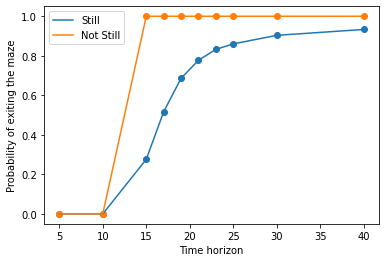

In [21]:
plt.scatter(Horizons,P_stay)
plt.plot(Horizons,P_stay ,label='Still')
plt.scatter(Horizons,P)
plt.plot(Horizons,P,label='Not Still')
plt.xlabel('Time horizon')
plt.ylabel("Probability of exiting the maze")
plt.legend()
plt.savefig('Problem1.png')

c) Assume now that your life is geometrically distributed with mean 30. Modify the problem
so as to derive a policy minimizing the expected time to exit the maze. Motivate your
new problem formulation. Estimate the probability of getting out alive using this policy by
simulating 10 000 games.

In [5]:
from tqdm import tqdm
minotaurStay= False
env = mz.Maze(maze,minotaurStay)
life = 30;
gamma   = 1 - (1/life);
epsilon = 0.0001;
simulation=10000
win_count=0
V, policy = mz.value_iteration(env, gamma, epsilon)
method = 'ValIter';
start  = ((0,0),(6,5));
for i in tqdm(range(simulation)):
    path = env.simulate(start, policy, method)
    if(path[-1][0]==(6,5)):
        win_count+=1
    # mz.animate_solution(maze, path)
P2= win_count/simulation
print('Probability of getting out alive: ',P2)

100%|██████████| 10000/10000 [00:06<00:00, 1603.07it/s]Probability of getting out alive:  1.0



In [6]:
from tqdm import tqdm
minotaurStay= True
env = mz.Maze(maze,minotaurStay)
life = 30;
gamma   = 1 - (1/life);
epsilon = 0.0001;
simulation=10000
win_count=0
V, policy = mz.value_iteration(env, gamma, epsilon)
method = 'ValIter';
start  = ((0,0),(6,5));
for i in tqdm(range(simulation)):
    path = env.simulate(start, policy, method)
    if(path[-1][0]==(6,5)):
        win_count+=1
    # mz.animate_solution(maze, path)
P2= win_count/simulation
print('Probability of getting out alive: ',P2)

100%|██████████| 10000/10000 [00:04<00:00, 2133.79it/s]Probability of getting out alive:  0.3464

